# Personalized Medicine: Redefining Cancer Treatment


<h2 style="color:darkblue;">Contents:</h2>
<p>
<a href="#intro">1.Introduction</a> <br/>
<a href="#eda">2.Exploratory Data analysis</a><br/>
&emsp;<a href="#dsi">2.1 Data Set Information</a><br/>
&emsp;<a href="#ld"> 2.2 Reading the data and loading the files</a><br/>
&emsp;<a href="#ndp"> 2.3 The number of data points for each class</a><br/>
&emsp;<a href="#len"> 2.4 Length of Text Field for each class</a><br/>
&emsp;<a href="#wrd"> 2.5 Word Count of each Text field</a><br/>
&emsp;<a href="#ugene"> 2.6 Unique Genes per Class</a><br/>
&emsp;<a href="#uvar"> 2.7 Unique Variation per Class</a><br/>
&emsp;<a href="#gvar"> 2.8 Unique Gene Per Variation</a><br/>
&emsp;<a href="#vgene"> 2.9 Unique Variation per Gene</a><br/>
&emsp;<a href="#scatter"> 2.10 Scatter plot for gene-variation</a><br/>
&emsp;<a href="#gdom"> 2.11 Genes dominating in every class</a><br/>
&emsp;<a href="#line"> 2.12 Plot for count of top genes</a><br/>
<a id="#pre">3.Preprocessing of Text Data</a><br/>
&emsp;<a href="#word"> 3. Word Cloud of Classes</a><br/>
</p>

## <a id="intro">1. Introduction </a>

This is the exploratory data analysis for Personalised Medicine for redefining Cancer Treatment.
<p>
Personalized Medicine refers to the idea of analyzing an individual patient's tumor to determine what combination of drugs will work best for that paricular individual. For doing this, the thousands of genetic mutation in cancer tumor needs to be distinguished into a. the mutations that contribute to tumor growth (drivers) b.the mutation which are neutral and do not contribute to tumor growth (passengers). The interpretation of genetic mutations is being done is currently done manually.
</p>

<p>
In this project we are going to automate the classification of these drivers from the passengers.
</p>


## <a id="eda">2.Exploratory Data Analysis:</a>

### <a id="dsi">2.1 Data Set Information</a>

<b>DATA SET CHARACTERISTICS:</b> Multivariate


<b>ATTRIBUTE CHARACTERISTICS:</b> Integer and String 


<b>NUMBER OF INSTANCES:</b> 3321


<b>NUMBER OF ATTRIBUTES:</b> 1.training_variants : 4 namely ID,Gene,Variation,Class

                       2.training_text : 2 namely ID,TEXT


<b>LABEL:</b> Class (1-9) denotes types of mutation


<b>MISSING VALUES:</b> Yes


About the given data:
The data comes in 4 different files. Two csv files and two text files:

<b>training/test variants:</b> These are csv catalogues of the gene mutations together with the target value Class, which is the (manually) classified assessment of the mutation. The feature variables are Gene, the specific gene where the mutation took place, and Variation, the nature of the mutation. The test data of course doesn’t have the Class values. This is what we have to predict. These two files each are linked through an ID variable to another file each, namely:

<b>training/test text:</b> Those contain an extensive description of the evidence that was used (by experts) to manually label the mutation classes.

The text information holds the key to the classification problem and will have to be understood/modelled well to achieve a useful accuracy.

### <a id="ld">2.2 Reading the data and loading the files</a>

In [1]:
import pandas as pd
import numpy as np
train_variants=pd.read_csv("training_variants")
test_variants=pd.read_csv("test_variants")
train_text=pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
test_text=pd.read_csv("test_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)


In [2]:
print train_variants.head()

   ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4


In [3]:
print train_text.head()

   ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...


In [4]:
# converting the train text to a list
test_text_list=test_text.TEXT.tolist()


In [5]:
len(str(test_text_list[:1]).split(" "))

7495

In [6]:
print train_variants.describe()

                ID        Class
count  3321.000000  3321.000000
mean   1660.000000     4.365854
std     958.834449     2.309781
min       0.000000     1.000000
25%     830.000000     2.000000
50%    1660.000000     4.000000
75%    2490.000000     7.000000
max    3320.000000     9.000000


### Unique Variations

In [7]:
unique_variation= set(train_variants.Variation)
print unique_variation
#print pd.unique(train_varients.Variation)

set(['Y62C', 'D399N', 'L858M', 'Q531*', 'E1586G', 'SRGAP3-RAF1 Fusion', 'H93Q', 'H93R', 'V564I', 'H93D', 'L1195V', 'K4E', 'T1623I', 'E203K', 'E2856A', 'P380R', 'R2505*', 'S786F', 'Y1463S', 'N581Y', 'G464E', 'S32I', 'N581S', 'MAGI3-AKT3 Fusion', 'A502_Y503dup', 'H697Y', 'Y53H', 'L2396F', 'R2450*', 'Y24C', 'N581D', 'S270L', 'D289del', 'V1188L', 'W557_K558del', 'L191H', 'H118P', 'EP300-MOZ Fusion', 'D603N', 'G480W', 'D289_D292del', 'L1122V', 'D351H', 'D603G', 'F460L', 'G17V', 'S860L', 'P86H', 'G1738R', 'C450_K451insMIEWMI', 'V411L', 'T1324N', 'G17A', 'V555_V559del', 'G776S', 'GPIAP1-PDGFRB Fusion', 'E598_Y599insGLVQVTGSSDNEYFYVDFREYE', 'D171G', 'P124Q', 'G165V', 'P124S', 'G829R', 'G165R', 'R496C', 'D835del', 'P95S', 'K558_E562del', 'R496H', 'R383*', 'G165E', 'R970C', 'P153H', 'D808N', 'G1743R', 'V118D', 'TRA-NKX2-1 Fusion', 'P106L', 'S562L', 'M504V', 'L387M', 'D600_L601insFREYEYD', 'M1008I', 'C630Y', 'Y801H', 'E719G', 'E719K', 'R283Q', 'K509I', 'I391M', 'Q227L', 'A750_E758delinsP', 'T599_

#### Unique Genes

In [8]:
unique_genes=set(train_variants.Gene)
print unique_genes
print len(unique_genes)

set(['ERRFI1', 'CCNE1', 'STK11', 'MEN1', 'FAM58A', 'AKT1', 'AKT2', 'AKT3', 'ARAF', 'RB1', 'IKBKE', 'NKX2-1', 'ROS1', 'AXL', 'RARA', 'RAD51D', 'BRCA1', 'PIK3CA', 'PIK3CB', 'MAP3K1', 'EIF1AX', 'INPP4B', 'WHSC1L1', 'GATA3', 'FGFR2', 'GLI1', 'CDH1', 'PPP6C', 'MYC', 'YAP1', 'BTK', 'NF2', 'CDKN2B', 'ERBB3', 'IGF1R', 'CDKN2A', 'PIK3R1', 'ERBB4', 'BARD1', 'IDH2', 'IDH1', 'NUP93', 'RET', 'BRD4', 'PMS1', 'MDM2', 'SETD2', 'MDM4', 'FGFR3', 'RAF1', 'FGFR1', 'MYD88', 'CCND1', 'ARID1B', 'ARID1A', 'CCND2', 'B2M', 'TCF7L2', 'KIT', 'FOXA1', 'PTEN', 'FAT1', 'RUNX1', 'WHSC1', 'APC', 'CCND3', 'CTCF', 'KDM5C', 'IL7R', 'DNMT3B', 'BRCA2', 'FOXP1', 'SDHC', 'CDKN1B', 'CDKN1A', 'RRAS2', 'CARM1', 'RIT1', 'PTPN11', 'RICTOR', 'KDM5A', 'XPO1', 'MYCN', 'PPM1D', 'SRSF2', 'ASXL1', 'TSC2', 'RASA1', 'ASXL2', 'JUN', 'PIK3R3', 'PIK3R2', 'H3F3A', 'JAK1', 'MSH2', 'FLT1', 'CHEK2', 'CARD11', 'CTLA4', 'TCF3', 'STAG2', 'ARID2', 'PBRM1', 'RNF43', 'VEGFA', 'HRAS', 'RHOA', 'FGF4', 'FGF3', 'PAX8', 'KEAP1', 'ETV1', 'EPAS1', 'MGA', 'T

<b>Merging the two train data set and building into one</b>

In [9]:
train = pd.merge(train_variants, train_text, on='ID')
print train.head()

   ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  Cyclin-dependent kinases (CDKs) regulate a var...  
1   Abstract Background  Non-small cell lung canc...  
2   Abstract Background  Non-small cell lung canc...  
3  Recent evidence has demonstrated that acquired...  
4  Oncogenic mutations in the monomeric Casitas B...  


In [10]:
# reading the numbers!
print("there are ", len(train["Variation"]),"rows for the training set")
print("there are ",len(unique_variation), " different values for variations")
print("there are ",len(unique_genes), " different values for genes")

('there are ', 3321, 'rows for the training set')
('there are ', 2996, ' different values for variations')
('there are ', 264, ' different values for genes')


In [11]:
print("Train variant shape : ",train_variants.shape)
print("Train text shape : ",train_text.shape)

('Train variant shape : ', (3321, 4))
('Train text shape : ', (3321, 2))


In [12]:
#(Q) What are the column names in our dataset?
print (train.columns)

Index([u'ID', u'Gene', u'Variation', u'Class', u'TEXT'], dtype='object')


In [13]:
#checking for null values in the merged data
train.TEXT.isnull().values.any()

False

### <a id="ndp">2.3 The number of data points for each class</a>

In [14]:
# counting
train["Class"].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

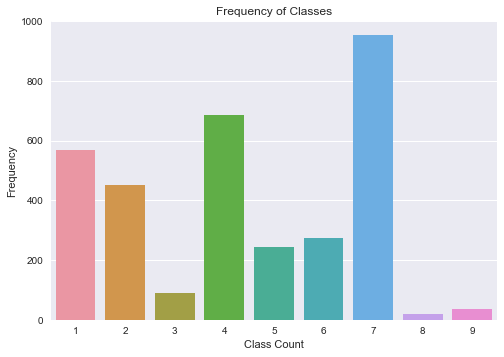

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x="Class", data=train_variants)
plt.ylabel('Frequency')
plt.xlabel('Class Count')
plt.title("Frequency of Classes")
plt.show()

<b>Findings:</b>


Class levels <b>3, 8, 9</b> are notably having least frequency or occurance.

Class Levels <b>5, 6</b> are of comparable, medium-low frequency

Class Levels <b>1, 2, 4</b> are of comparable, medium-high frequency

Class Level <b>7</b> is clearly the most frequent one

### <a id="len">2.4 Length of Text Field for each class</a>

In [16]:
# we add a new column in the dataframe called 'LenText' which contains the length of each text field
train.loc[:,'LenText'] =(train['TEXT'].str.len()).astype(int)
print train.head()

   ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  LenText  
0  Cyclin-dependent kinases (CDKs) regulate a var...    39765  
1   Abstract Background  Non-small cell lung canc...    36831  
2   Abstract Background  Non-small cell lung canc...    36831  
3  Recent evidence has demonstrated that acquired...    36308  
4  Oncogenic mutations in the monomeric Casitas B...    41427  


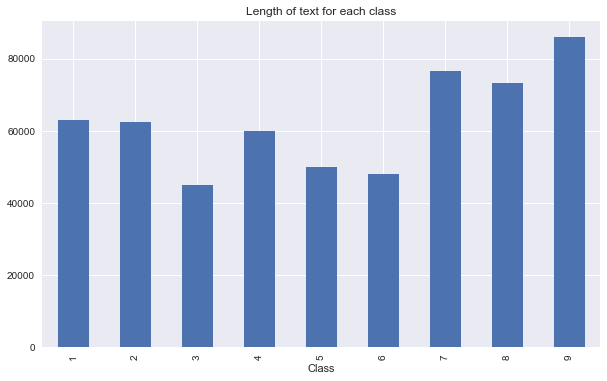

In [17]:
train.groupby('Class')['LenText'].mean().plot(kind='bar',title='Length of text for each class',figsize=(10,6))
plt.show()

#### Observation:

For Class 9 mutation, the description of the text is highest

For Class 7 and 8, the description length is similar

For Class 1,2 and 4, the description length is almost similar

For Class 3,5 and 6, the description length is least

### <a id="wrd">2.5 Word Count of each Text field</a>

In [18]:
# creating a new column called Text Count
train.loc[:, 'Text_count']  = train["TEXT"].apply(lambda x: len(x.split()))
train.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  LenText  Text_count  
0  Cyclin-dependent kinases (CDKs) regulate a var...    39765        6089  
1   Abstract Background  Non-small cell lung canc...    36831        5722  
2   Abstract Background  Non-small cell lung canc...    36831        5722  
3  Recent evidence has demonstrated that acquired...    36308        5572  
4  Oncogenic mutations in the monomeric Casitas B...    41427        6202

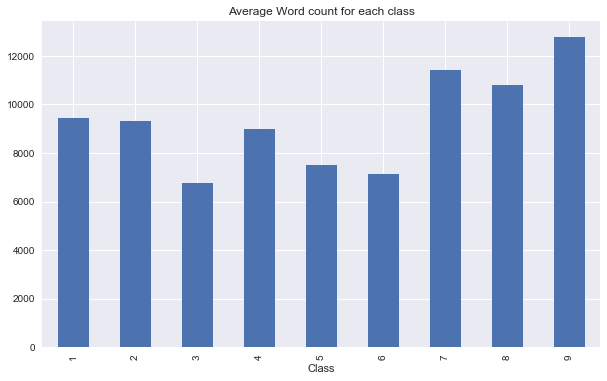

In [19]:
# plot for word count
train.groupby('Class')['Text_count'].mean().plot(kind='bar',title='Average Word count for each class',figsize=(10,6))
plt.show()

This has similar distribution to that of the character count

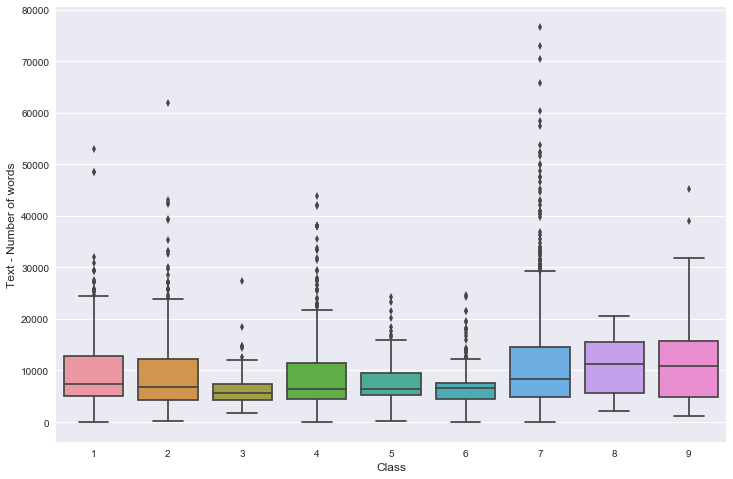

In [20]:
# box plot for class and word count
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_count', data=train)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

In [21]:
print max(train['Text_count'])

76708


This plot tells us that class 3,6 is distinguishable from rest of the classes

###  Finding null values in text field

In [22]:
count_grp = train.groupby('Class')['Text_count']
count_grp.describe()

count          mean           std     min      25%      50%       75%  \
Class                                                                          
1      568.0   9444.545775   6513.469240     1.0  4970.00   7286.5  12868.25   
2      452.0   9306.261062   7624.222077   116.0  4184.25   6810.0  12209.50   
3       89.0   6751.123596   3724.401696  1737.0  4283.00   5572.0   7415.00   
4      686.0   8978.188047   7276.221057    53.0  4566.00   6351.0  11521.75   
5      242.0   7504.409091   3890.285827   183.0  5245.00   6451.0   9513.50   
6      275.0   7143.058182   3827.958077     1.0  4505.50   6587.0   7626.00   
7      953.0  11437.771249  10105.042389     1.0  4871.00   8254.0  14619.00   
8       19.0  10810.105263   5645.073662  2111.0  5586.00  11237.0  15535.00   
9       37.0  12798.567568  10208.668344  1146.0  4942.00  10917.0  15797.00   

           max  
Class           
1      52969.0  
2      61923.0  
3      27371.0  
4      43893.0  
5      24214.0  
6      24597.0  
7      76708.0  
8      20612.0  
9      45126.0

In [23]:
train[train['Text_count']==1.0]

ID    Gene             Variation  Class  TEXT  LenText  Text_count
1109  1109   FANCA                S1088F      1  null        4           1
1277  1277  ARID5B  Truncating Mutations      1  null        4           1
1407  1407   FGFR3                 K508M      6  null        4           1
1639  1639    FLT1         Amplification      6  null        4           1
2755  2755    BRAF                 G596C      7  null        4           1

In [24]:
train[train['Text_count']==1.0].count()

ID            5
Gene          5
Variation     5
Class         5
TEXT          5
LenText       5
Text_count    5
dtype: int64

<b>So we can conclude that there are some fields where there is no values.</b>

# Pair-plot of the features

C:\Users\Ashu\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Ashu\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Ashu\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


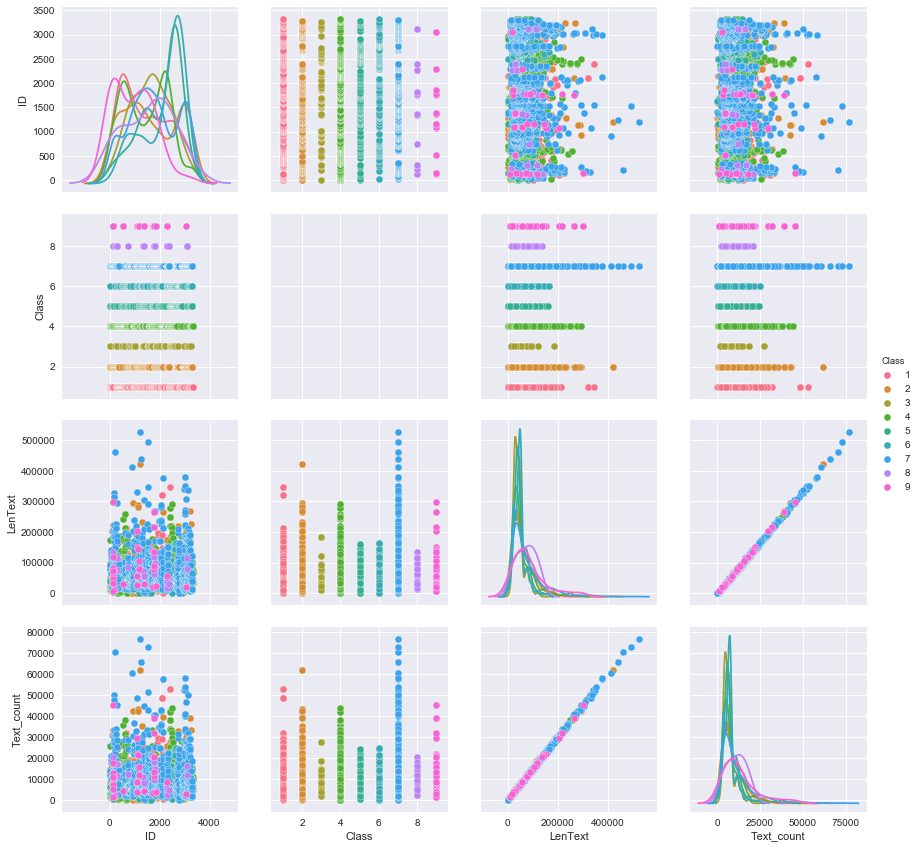

In [25]:
sns.pairplot(train, hue="Class", size=3, diag_kind="kde");
plt.show()

### <a id="ugene">2.6 Unique Genes per Class</a>

In [26]:
unique_gene_class={}
for i in range(1,10):
    unique_gene_class[i]=set()
    for index, row in train.iterrows():
        if(i==(row['Class'])):
                unique_gene_class[i].add(row['Gene'])
print unique_gene_class

{1: set(['ERRFI1', 'STK11', 'FAM58A', 'B2M', 'RB1', 'RAD51D', 'BRCA1', 'MAP3K1', 'INPP4B', 'NTRK2', 'GATA3', 'HNF1A', 'CDH1', 'NF2', 'CDKN2B', 'CDKN2C', 'IGF1R', 'CDKN2A', 'NF1', 'BARD1', 'NUP93', 'RET', 'PMS2', 'SETD2', 'FGFR2', 'FGFR3', 'FGFR1', 'ARID1B', 'ARID1A', 'TCF7L2', 'FOXA1', 'PTEN', 'FAT1', 'RUNX1', 'APC', 'PTPN11', 'CTCF', 'BRCA2', 'FOXP1', 'CDKN1B', 'CDKN1A', 'FUBP1', 'CARM1', 'XRCC2', 'ASXL1', 'ASXL2', 'PIK3R3', 'PIK3R2', 'PIK3R1', 'JAK1', 'CHEK2', 'CTLA4', 'STAG2', 'ARID2', 'PBRM1', 'RNF43', 'RAD21', 'RHOA', 'MGA', 'TP53', 'ETV6', 'CBL', 'SHQ1', 'PRDM1', 'CREBBP', 'AGO2', 'PDGFRB', 'PDGFRA', 'SMAD4', 'ATM', 'SMAD2', 'SMAD3', 'POLE', 'ATR', 'BRIP1', 'TSC2', 'FLT3', 'NCOR1', 'TSC1', 'RASA1', 'RBM10', 'FANCC', 'FANCA', 'HLA-B', 'KDM6A', 'HLA-A', 'FBXW7', 'TGFBR2', 'TGFBR1', 'KMT2D', 'TET1', 'ERCC4', 'TET2', 'BCOR', 'ATRX', 'EP300', 'RAD51C', 'ERCC2', 'HIST1H1C', 'KNSTRN', 'DICER1', 'ARID5B', 'KEAP1', 'RAD50', 'CIC', 'PPP2R1A', 'MSH2', 'ERCC3', 'EGFR', 'MSH6', 'VHL', 'FOXO1'

In [27]:
unique_gene_class_count={}

for k,v in sorted(unique_gene_class.items()):
    unique_gene_class_count[k]=len(v)
print unique_gene_class_count

{1: 142, 2: 96, 3: 26, 4: 92, 5: 48, 6: 56, 7: 108, 8: 12, 9: 10}


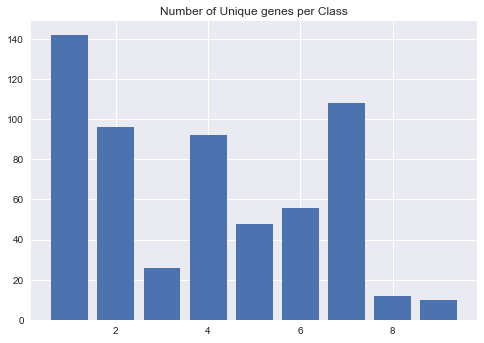

In [28]:
plt.figure()
plt.bar(unique_gene_class_count.keys(),unique_gene_class_count.values())
plt.title('Number of Unique genes per Class')
plt.show()

### <a id="uvar">2.7 Unique Variation per Class</a>

In [29]:
# unique variation per class
unique_variation_class={}
for i in range(1,10):
    unique_variation_class[i]=set()
    for index, row in train.iterrows():
        if(i==(row['Class'])):
                unique_variation_class[i].add(row['Variation'])
print unique_variation_class

{1: set(['E70K', 'G508S', 'W1610G', 'R802*', 'A209T', 'V1688del', 'G207E', 'R1835P', 'M253K', 'N238S', 'V1714G', 'R2450*', 'Y24C', 'I1307K', 'D520N', 'T24A', 'L455M', 'K218T', 'G637W', 'C324Y', 'H214N', 'L348F', 'G67R', 'G17E', 'K1702E', 'L348S', 'H1746N', 'H214R', 'H214Q', 'G245D', 'G245A', 'W1291R', 'I195T', 'W1837C', 'K129E', 'P153H', 'W1837G', 'G1743R', 'I251S', 'E40W', 'D1709E', 'K291E', 'V143A', 'R283Q', '1_2009trunc', 'P179L', 'R1040L', 'P179R', 'D1739Y', 'L46R', 'D257N', 'R183Q', 'R183P', 'D300N', 'M1689T', 'K11R', 'G423R', 'H179N', 'R183G', 'H284P', 'R174C', 'E606G', 'H284N', 'S240R', 'R337L', 'A298T', 'S215C', 'Q545A', 'V1736G', 'D1739E', 'V242F', 'N510K', 'P133T', 'T1685A', 'D617G', 'R280T', 'R280A', 'R202S', 'Y297A', 'A707T', 'L370fs', 'S567L', 'Q1503P', 'A717G', 'Y426A', 'F341C', 'V1838E', 'L330R', 'G271E', 'I1807S', 'K517R', 'S1088F', 'R2602T', 'R698W', 'E330G', 'M133T', 'C242F', 'C135S', 'R659L', 'D423N', 'K507A', 'A211D', 'R158C', 'R315*', 'S1036P', 'I255F', 'L1657P', '

In [30]:
unique_variation_class_count={}

for k,v in sorted(unique_variation_class.items()):
    unique_variation_class_count[k]=len(v)
print unique_variation_class_count

{1: 423, 2: 399, 3: 89, 4: 669, 5: 242, 6: 265, 7: 889, 8: 19, 9: 37}


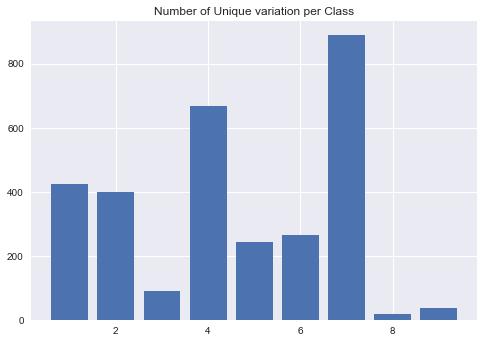

In [31]:
plt.figure()
plt.bar(unique_variation_class_count.keys(),unique_variation_class_count.values())
plt.title('Number of Unique variation per Class')
plt.show()

# Dictionary Of  Unique Variations Per Gene

In [32]:
unique_gene_variation={}
for gene in unique_genes:
    data=train.loc[train.Gene==gene]
    unique_gene_variation[gene]=data.Variation.unique()
print unique_gene_variation
print len(unique_gene_variation)

{'ERRFI1': array(['Deletion'], dtype=object), 'ASXL2': array(['Truncating Mutations'], dtype=object), 'STK11': array(['L67P', 'M136R', 'G163D', 'W308C', 'K78A', 'D194Y', 'R304W',
       'Deletion', 'Truncating Mutations', 'H174R', 'A205T', 'K78I',
       'F354L'], dtype=object), 'MEN1': array(['Deletion'], dtype=object), 'FAM58A': array(['Truncating Mutations'], dtype=object), 'AKT1': array(['E267G', 'L321A', 'Q59E', 'E40K', 'K179M', 'L362R', 'V270A',
       'R370C', 'L52R', 'E49K', 'E17K', 'Q79E', 'G311D', 'L78T', 'Q79K',
       'V271A', 'P42T', 'K39N', 'W80A', 'D32Y', 'T195I', 'D325A', 'K189N',
       'N53A', 'D323H', 'R23A', 'L202F', 'C77F'], dtype=object), 'AKT2': array(['D32H', 'K181M', 'I289M', 'R170W', 'R368C', 'G161V', 'Fusions',
       'H355M', 'Amplification', 'E17K', 'D399N'], dtype=object), 'AKT3': array(['MAGI3-AKT3 Fusion', 'E17K', 'Amplification', 'Fusions'], dtype=object), 'ARAF': array(['N217I', 'S214A', 'S214T', 'Q347_A348del', 'F351L', 'S214C', 'G322S'], dtype=object

No. Of Unique Variations Per Gene 

In [33]:
unique_gene_variation_count={}
for key, value in sorted(unique_gene_variation.items()):
         unique_gene_variation_count[key]= len(value)
print unique_gene_variation_count
print max(unique_gene_variation_count.values())

{'ERRFI1': 1, 'ASXL2': 1, 'STK11': 13, 'MEN1': 1, 'FAM58A': 1, 'AKT1': 28, 'AKT2': 11, 'AKT3': 4, 'ARAF': 7, 'RB1': 10, 'IKBKE': 1, 'NKX2-1': 6, 'MDM2': 1, 'AXL': 1, 'RARA': 1, 'RAD51D': 1, 'MDM4': 1, 'PIK3CB': 10, 'MAP3K1': 4, 'EIF1AX': 1, 'INPP4B': 1, 'NTRK2': 3, 'GATA3': 3, 'TSC1': 20, 'HNF1A': 3, 'CDH1': 9, 'PIK3R3': 1, 'MYC': 8, 'FGFR1': 13, 'BTK': 3, 'PIK3R2': 8, 'CDKN2B': 7, 'ERBB3': 11, 'IGF1R': 3, 'CDKN2A': 52, 'NF1': 16, 'ERBB4': 20, 'BARD1': 1, 'IDH2': 5, 'IDH1': 16, 'U2AF1': 3, 'NUP93': 3, 'KLF4': 1, 'VHL': 41, 'RET': 40, 'BRD4': 2, 'PMS1': 1, 'FGFR4': 3, 'SETD2': 3, 'FGFR2': 50, 'FGFR3': 39, 'ALK': 69, 'CCND1': 13, 'ARID1B': 2, 'ARID1A': 1, 'CCND2': 1, 'B2M': 6, 'TCF7L2': 1, 'KIT': 99, 'FOXA1': 8, 'PTEN': 126, 'FAT1': 4, 'RUNX1': 24, 'RRAS2': 1, 'WHSC1': 1, 'APC': 5, 'CCND3': 7, 'CTCF': 5, 'KDM5C': 5, 'IL7R': 1, 'KMT2C': 4, 'FOXP1': 2, 'SDHC': 1, 'CDKN1B': 4, 'CDKN1A': 3, 'FUBP1': 1, 'ERG': 4, 'CARM1': 3, 'MSH2': 21, 'PTPN11': 26, 'RICTOR': 1, 'XPO1': 2, 'MYCN': 2, 'PPM1D'

# Plot Of No. Unique Variations Per Gene 

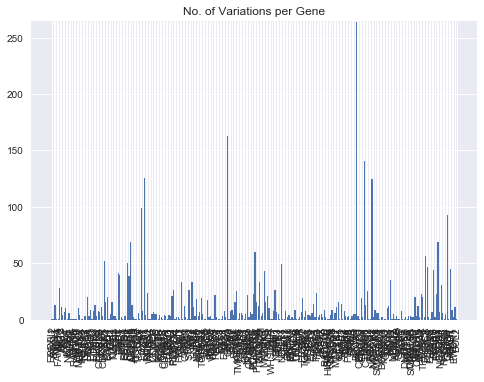

In [34]:

plt.figure()
x=np.arange(len(unique_gene_variation_count))
plt.bar(x,unique_gene_variation_count.values(),align='center')
plt.xticks(x,unique_gene_variation_count.keys(),rotation=90)
ymax=max(unique_gene_variation_count.values())+1
plt.ylim(0,ymax)

plt.title("No. of Variations per Gene")

plt.show()

Out of 264 unique genes values in training data, 104 genes occur in a class of mutation.

# Dictionary of Unique Genes Per Variation

In [35]:
unique_variation_gene={}
for variation in unique_variation:
    data=train.loc[train.Variation== variation]
    unique_variation_gene[variation]=data.Gene.unique()
print unique_variation_gene

{'Y62C': array(['PTPN11'], dtype=object), 'D399N': array(['AKT2'], dtype=object), 'V561D': array(['PDGFRA'], dtype=object), 'Q531*': array(['SRC'], dtype=object), 'E1586G': array(['BRCA1'], dtype=object), 'SRGAP3-RAF1 Fusion': array(['RAF1'], dtype=object), 'H93Q': array(['PTEN'], dtype=object), 'H93R': array(['PTEN'], dtype=object), 'K650T': array(['FGFR3'], dtype=object), 'V564I': array(['FGFR2'], dtype=object), 'H93D': array(['PTEN'], dtype=object), 'L1195V': array(['MET'], dtype=object), 'K4E': array(['MEF2B'], dtype=object), 'R2505Q': array(['MTOR'], dtype=object), 'E203K': array(['MAP2K1'], dtype=object), 'E2856A': array(['BRCA2'], dtype=object), 'P380R': array(['AR'], dtype=object), 'R2505*': array(['MTOR'], dtype=object), 'S786F': array(['ERCC4'], dtype=object), 'Y1463S': array(['MTOR'], dtype=object), 'N581Y': array(['BRAF'], dtype=object), 'D537Y': array(['SMAD4'], dtype=object), 'S32I': array(['NFKBIA'], dtype=object), 'K650R': array(['FGFR3'], dtype=object), 'N581S': array(

No. of Unique Genes Per Variations

In [36]:
unique_variation_gene_count={}
for key, value in sorted(unique_variation_gene.items()):
         unique_variation_gene_count[key]= len(value)
print unique_variation_gene_count
print max(unique_variation_gene_count.values())

{'Y62C': 1, 'D399N': 1, 'V561D': 1, 'Q531*': 1, 'E1586G': 1, 'SRGAP3-RAF1 Fusion': 1, 'H93Q': 1, 'H93R': 1, 'V561A': 1, 'V564I': 1, 'H93D': 1, 'L1195V': 1, 'K4E': 1, 'Q227R': 1, 'E203K': 1, 'E2856A': 1, 'P380R': 1, 'R2505*': 1, 'S786F': 1, 'Y1463S': 1, 'N581Y': 1, 'D537Y': 1, 'S32I': 1, 'N581S': 1, 'MAGI3-AKT3 Fusion': 1, 'A502_Y503dup': 1, 'H697Y': 1, 'Y53H': 1, 'L2396F': 1, 'R2450*': 1, 'D3170G': 1, 'N581D': 1, 'G464A': 1, 'D289del': 1, 'V1188L': 1, 'W557_K558del': 1, 'L191H': 1, 'H118P': 1, 'EP300-MOZ Fusion': 1, 'D603N': 1, 'G480W': 1, 'D289_D292del': 1, 'L1122V': 1, 'D351H': 1, 'D603G': 1, 'F460L': 1, 'G17V': 1, 'S860L': 1, 'P86H': 1, 'N345I': 1, 'G1738R': 1, 'C450_K451insMIEWMI': 1, 'V411L': 1, 'T1324N': 1, 'E2663V': 1, 'V555_V559del': 1, 'G1738E': 1, 'GPIAP1-PDGFRB Fusion': 1, 'E598_Y599insGLVQVTGSSDNEYFYVDFREYE': 1, 'P124Q': 1, 'G165V': 1, 'P124S': 1, 'G829R': 1, 'G165R': 1, 'R496C': 1, 'D835del': 1, 'P95S': 1, 'K558_E562del': 1, 'R496H': 1, 'R383*': 1, 'G165E': 1, 'R156H': 1, 

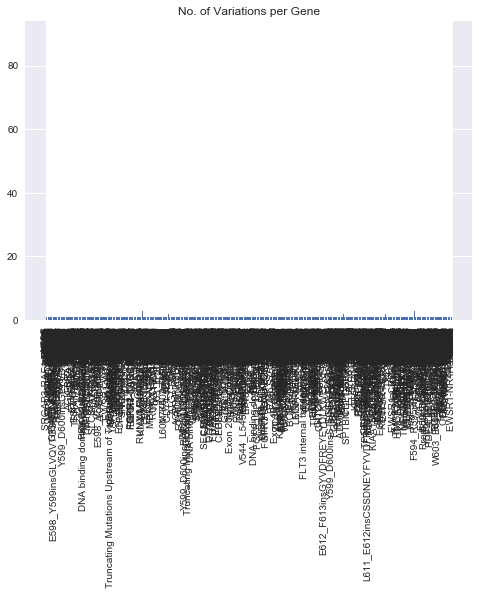

In [37]:
plt.figure()
x=np.arange(len(unique_variation_gene_count))
plt.bar(x,unique_variation_gene_count.values(),align='center')
plt.xticks(x,unique_variation_gene_count.keys(),rotation=90)
ymax=max(unique_variation_gene_count.values())+1
plt.ylim(0,ymax)

plt.title("No. of Variations per Gene")

plt.show()

### <a id="scatter">2.10 Scatter plot for gene-variation</a>

In [38]:
# number of unique genes
print "the number of unique genes =", len(unique_genes)

the number of unique genes = 264


In [39]:
# assigning unique numbers for each unique genes
number_gene={}
ctr=1
for i in set(unique_genes):
    number_gene[ctr]=i
    ctr=ctr+1

In [40]:
# assigning unique numbers for each unique variation
number_variation={}
ctr=1
for i in set(unique_variation):
    number_variation[ctr]=i
    ctr=ctr+1


In [41]:
# creating a new dataframe with the numerical values
import pandas as pd
dfnum_traino=train.copy(deep=True)
#for gene

for index, row in dfnum_traino.iterrows():
    for j in dict(number_gene):
        if(row['Gene']==number_gene[j]):
            dfnum_traino.loc[index,'Gene']=j

In [42]:
#for variation   

for index, row in dfnum_traino.iterrows():
    for j in dict(number_variation):
        if(row['Variation']==number_variation[j]):
            dfnum_traino.loc[index,'Variation']=j                
print dfnum_traino

        ID Gene Variation  Class  \
0        0  121      2500      1   
1        1   60       913      2   
2        2   60      2069      2   
3        3   60      2311      3   
4        4   60      1164      4   
5        5   60       651      4   
6        6   60       756      5   
7        7   60      2517      1   
8        8   60      1362      4   
9        9   60       117      4   
10      10   60      1312      4   
11      11   60      2422      4   
12      12   60      1542      4   
13      13   60       116      4   
14      14   60      1579      5   
15      15   60      1481      4   
16      16   60      2500      1   
17      17   60       549      4   
18      18   60      2473      5   
19      19   60      1366      4   
20      20   60      1453      6   
21      21   60      1541      4   
22      22   60      1999      4   
23      23   60       739      4   
24      24   60      2091      4   
25      25   60      1569      4   
26      26  216      1699   

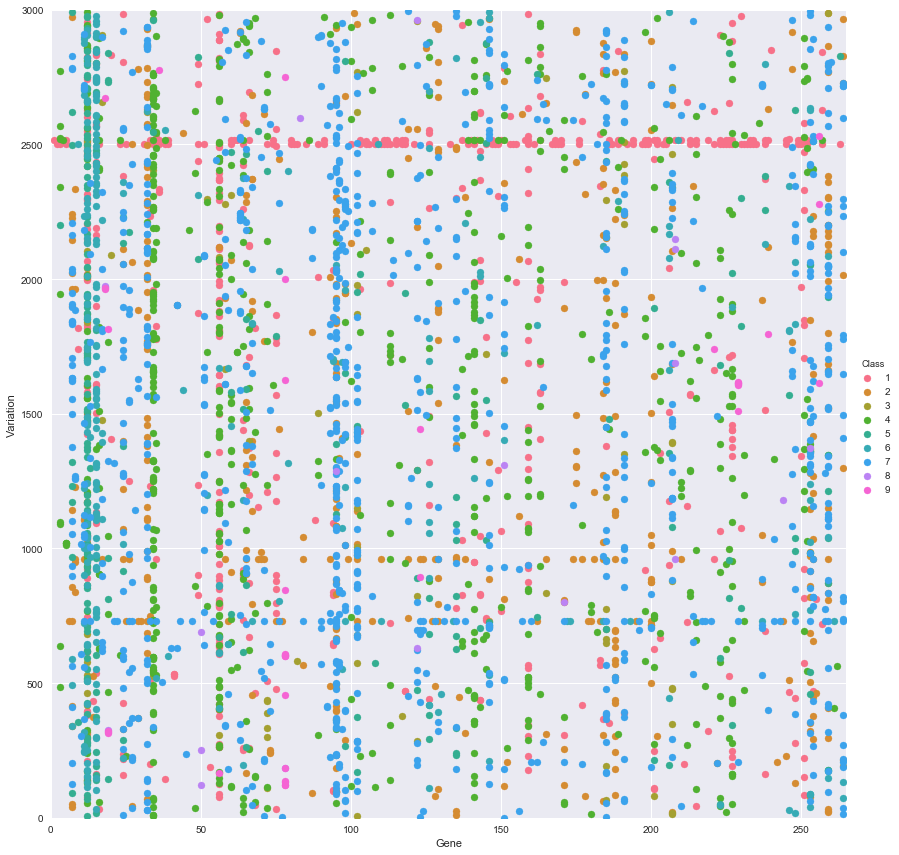

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(200,150))
sns.FacetGrid(dfnum_traino, hue="Class", size=12) \
   .map(plt.scatter, "Gene", "Variation") \
   .add_legend();
# sns.FacetGrid(dfnum_traino.loc[dfnum_traino['Class']==7], hue="Class", size=12) \
#    .map(plt.scatter, "Gene", "Variation") \
#    .add_legend();
plt.ylim(0, 3000)
plt.xlim(0,265)
plt.show();

In [44]:
print number_variation[2500]

Truncating Mutations


<b>Observation:</b>

 We can see that class 7 dominates over most of the genes and variation

### <a id="gdom">2.11 Genes dominating in every class</a>

In [45]:
#checking max occurance of genes
gene_group = train.groupby("Gene")['Gene'].count()
print gene_group.sort_values(ascending=False)[:15]

Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
Name: Gene, dtype: int64


### Top dominating genes for Class 1

In [46]:
train1=train[train.Class==1]
gene_group = train1.groupby("Gene")['Gene'].count()
cls1=gene_group.sort_values(ascending=False)[:10]
print cls1

Gene
TP53     83
BRCA1    60
TSC2     23
BRCA2    18
ERCC2    17
VHL      15
SMAD4    13
PTPRT    13
SMAD3    11
SMAD2    11
Name: Gene, dtype: int64


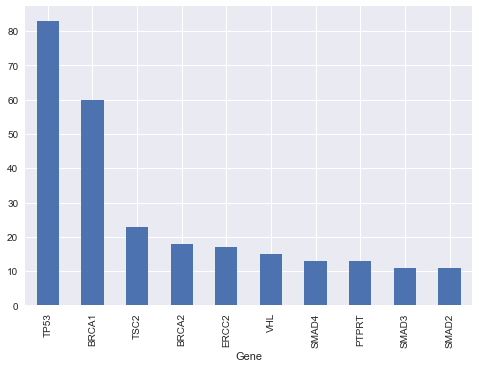

In [47]:
cls1.plot(kind='bar')


### Top dominating genes for Class 2

In [48]:
train2=train[train.Class==2]
gene_group = train2.groupby("Gene")['Gene'].count()
cls2=gene_group.sort_values(ascending=False)[:10]
print cls2

Gene
EGFR      45
KIT       44
BRAF      31
ABL1      24
ROS1      18
HRAS      15
PDGFRB    14
ERBB2     14
PIK3CA    14
NOTCH1    13
Name: Gene, dtype: int64


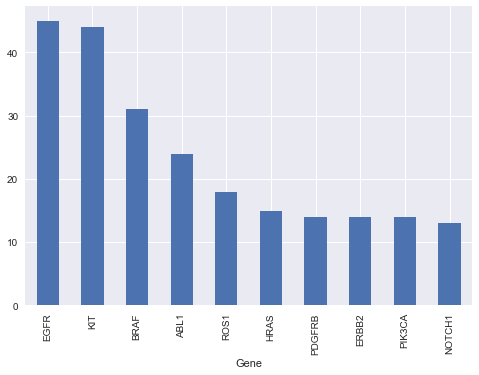

In [49]:
cls2.plot(kind='bar')


### Top dominating genes for Class 3

In [50]:
train3=train[train.Class==3]
gene_group = train3.groupby("Gene")['Gene'].count()
cls3=gene_group.sort_values(ascending=False)[:10]
print cls1

Gene
TP53     83
BRCA1    60
TSC2     23
BRCA2    18
ERCC2    17
VHL      15
SMAD4    13
PTPRT    13
SMAD3    11
SMAD2    11
Name: Gene, dtype: int64


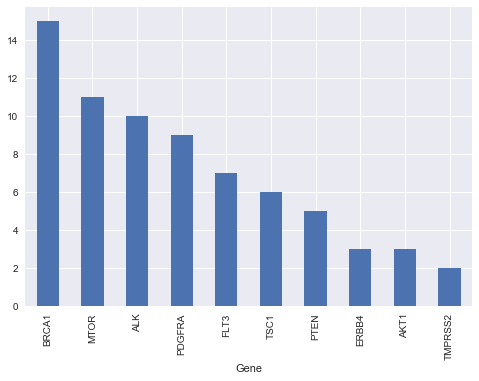

In [51]:
cls3.plot(kind='bar')


### Top dominating genes for Class 4

In [52]:
train4=train[train.Class==4]
gene_group = train4.groupby("Gene")['Gene'].count()
cls4=gene_group.sort_values(ascending=False)[:10]
print cls4

Gene
PTEN      115
TP53       67
CDKN2A     47
BRCA1      46
TSC2       23
VHL        23
CBL        16
RUNX1      16
PIK3R1     15
SPOP       15
Name: Gene, dtype: int64


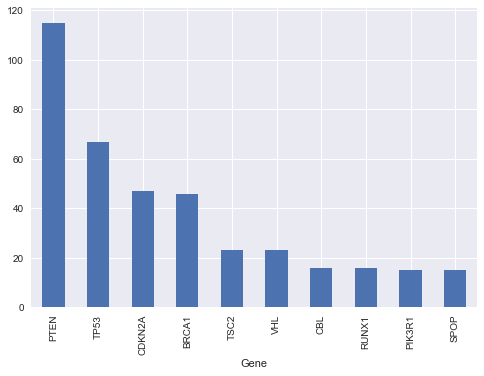

In [53]:
cls4.plot(kind='bar')


### Top dominating genes for Class 5

In [54]:
train5=train[train.Class==5]
gene_group = train5.groupby("Gene")['Gene'].count()
cls5=gene_group.sort_values(ascending=False)[:10]
print cls5

Gene
BRCA1     90
BRCA2     20
FGFR3     10
BRAF       8
PIK3CA     8
MLH1       6
ERBB2      6
IDH1       6
FGFR2      5
PMS2       5
Name: Gene, dtype: int64


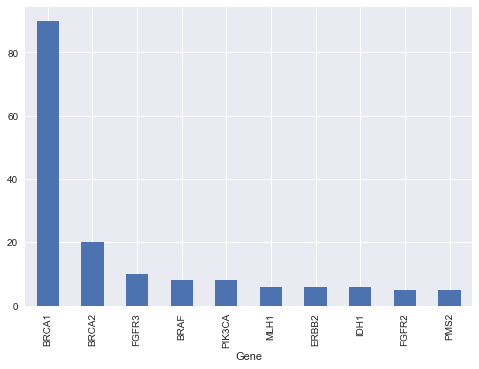

In [55]:
cls5.plot(kind='bar')


### Top dominating genes for Class 6

In [56]:
train6=train[train.Class==6]
gene_group = train6.groupby("Gene")['Gene'].count()
cls6=gene_group.sort_values(ascending=False)[:10]
print cls6

Gene
BRCA2    84
BRCA1    53
JAK2     14
ERBB2    12
MLH1     11
TET2      6
TP53      5
KRAS      4
PIM1      4
ERBB4     4
Name: Gene, dtype: int64


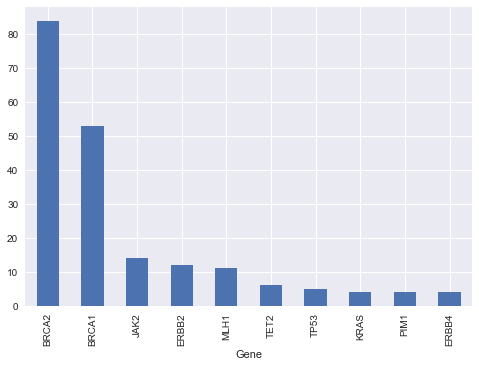

In [57]:
cls6.plot(kind='bar')


### Top dominating genes for Class 7

In [58]:
train7=train[train.Class==7]
gene_group = train7.groupby("Gene")['Gene'].count()
cls7=gene_group.sort_values(ascending=False)[:10]
print cls7

Gene
EGFR      84
KIT       52
BRAF      48
ALK       47
PDGFRA    42
FLT3      37
KRAS      33
PIK3CA    31
ERBB2     30
FGFR2     27
Name: Gene, dtype: int64


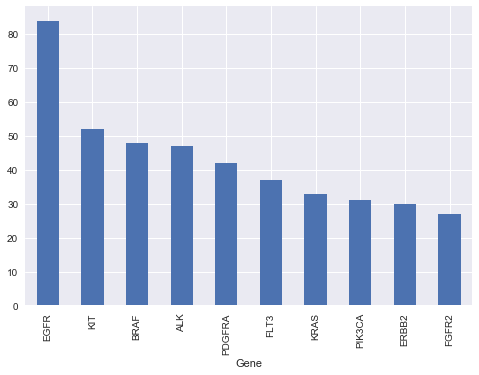

In [59]:
cls7.plot(kind='bar')


### Top dominating genes for Class 8

In [60]:
train8=train[train.Class==8]
gene_group = train8.groupby("Gene")['Gene'].count()
cls8=gene_group.sort_values(ascending=False)[:10]
print cls8

Gene
BCOR      4
H3F3A     3
IDH2      2
AKT1      2
SF3B1     1
RHOA      1
RAD51B    1
PTPN11    1
IDH1      1
ERBB2     1
Name: Gene, dtype: int64


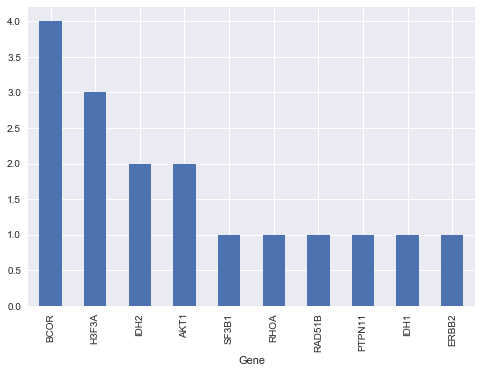

In [61]:
cls8.plot(kind='bar')


### Top dominating genes for Class 9

In [62]:
train9=train[train.Class==9]
gene_group = train9.groupby("Gene")['Gene'].count()
cls9=gene_group.sort_values(ascending=False)[:10]
print cls9

Gene
SF3B1    15
EZH2      6
IDH1      4
U2AF1     3
IDH2      3
AKT2      2
TP53      1
MED12     1
CTCF      1
CIC       1
Name: Gene, dtype: int64


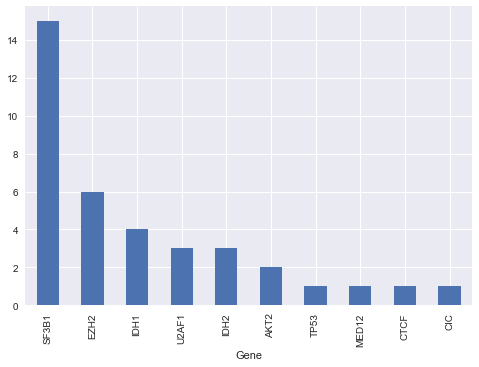

In [63]:
cls9.plot(kind='bar')


### Observation from the above plots:

The 9 plots for each class shows the distribution of the highest occuring genes for each class. This would help us in understanding and thus would help us in featurization.

## <a id="pre">3. Preprocessing of Text Data</a>

### <a id="word">3.1 Word Cloud for Class 1</a>

In [65]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
import collections
def create_word_corpus(class_value):
    text=train[train.Class==int(class_value)].TEXT.tolist()
    for i in range (len(text)):
        for k in text[i].split("\n"):
            text[i]=re.sub(r"[^a-zA-Z0-9]+", ' ', k)
    
    word_dict=[]
    stopword=set(stopwords.words("english"))
    stopword.update((u'fig','1','figure'))
    stopword.update(str(i) for i in range(2,1000))
    for val in text:
        tokens =[]
        for element in val.split(" "):
            tokens.append(element)
    word_dict = [word for word in tokens if word.lower() not in stopword] 
    counter=collections.Counter(word_dict)
    top_1000_words=counter.most_common(1000)
    top_words=[]
    for i in range(0,len(top_1000_words)):
        top_words.append(top_1000_words[i][0])
    print top_words
    corpus=""
    for element in top_words:
        corpus=corpus+element+" "
    return corpus

In [66]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

In [67]:

# Generate a word cloud image
class1_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(1)))


['RUNX1', 'q22', 'AML', 'gene', 'RUNX1T1', 'M2', 'fusion', 'genes', 'protein', 'RHD', 'translocations', 'translocation', 'q13', 'involving', 'domain', 'chromosome', 'TAD', 'leukemia', 'patients', 'three', 'partner', 'identified', 'transcription', 'frame', 'ins', 'cases', 'p22', 'region', 'Table', 'ETV6', 'M1', 'MDS', 'located', 'two', 'part', 'q24', 'q12', 'activation', 'RP11', 'p13', 'one', 'transcript', 'amino', 'n', 'q26', 'truncated', 'cell', 'reported', 'band', 'q21', 'way', 'different', 'zinc', 'involved', 'chimeric', 'including', 'formation', 'chromosomes', 'binding', 'complex', 'q22q22', 'MECOM', 'M4', 'X', 'finger', 'function', 'type', 'AML1', 'target', 'analysis', 'homology', 'terminal', 'FISH', 'transcriptional', 'described', 'q21q22', 'Runt', 'RPL22L1', 'sequence', 'PRDM16', 'myeloid', 'breakpoint', 'retaining', 'acids', 'However', 'four', 'CMML', 'known', 'alias', 'hematopoietic', 'exons', 'leading', 'B', 'leads', 'also', 'using', 'cells', 'associated', 'includes', 'PCR', 

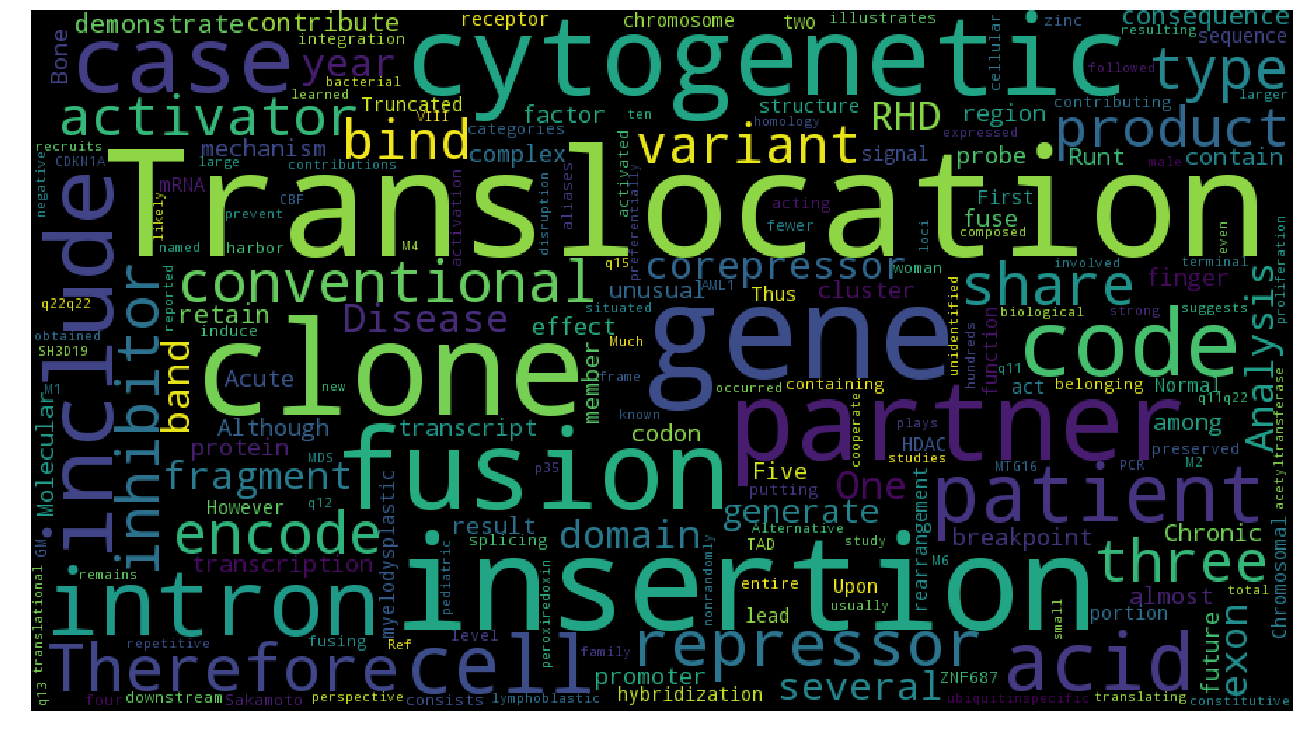

In [68]:
plot_Cloud(class1_wordclou)

In [69]:
class2_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(2)))

['RET', 'I852M', 'cells', 'cell', 'NIH3T3', 'calcitonin', 'sequence', 'mutant', 'V804M', 'A883F', 'mutations', 'MEN2', 'levels', 'years', 'mutants', 'l', 'MTC', 'normal', 'ng', 'class', 'patient', 'variation', 'family', 'C634R', 'activity', 'thyroid', 'old', 'expressing', 'year', 'ATA', 'basal', 'kinase', 'age', 'assay', 'transforming', 'potential', 'stimulated', 'germline', 'serum', 'lines', 'found', 'vitro', 'screening', 'analysis', 'DNA', 'evidence', 'mutation', 'phosphorylation', 'two', 'disease', 'based', 'cancer', 'clinical', 'node', 'asymptomatic', 'carriers', 'revealed', 'thyroidectomy', 'unknown', 'parental', 'informed', 'three', 'causative', 'increased', 'missense', 'tyrosine', 'lymph', 'variations', 'USA', 'activities', 'FMTC', 'index', 'panel', 'RET51', 'weaker', 'significance', 'invasion', 'consent', 'experiments', 'XTT', 'management', 'determined', 'medullary', 'histopathological', 'C', 'characterization', 'CA', 'protein', 'polymorphism', 'database', 'mother', 'Thyroid', 

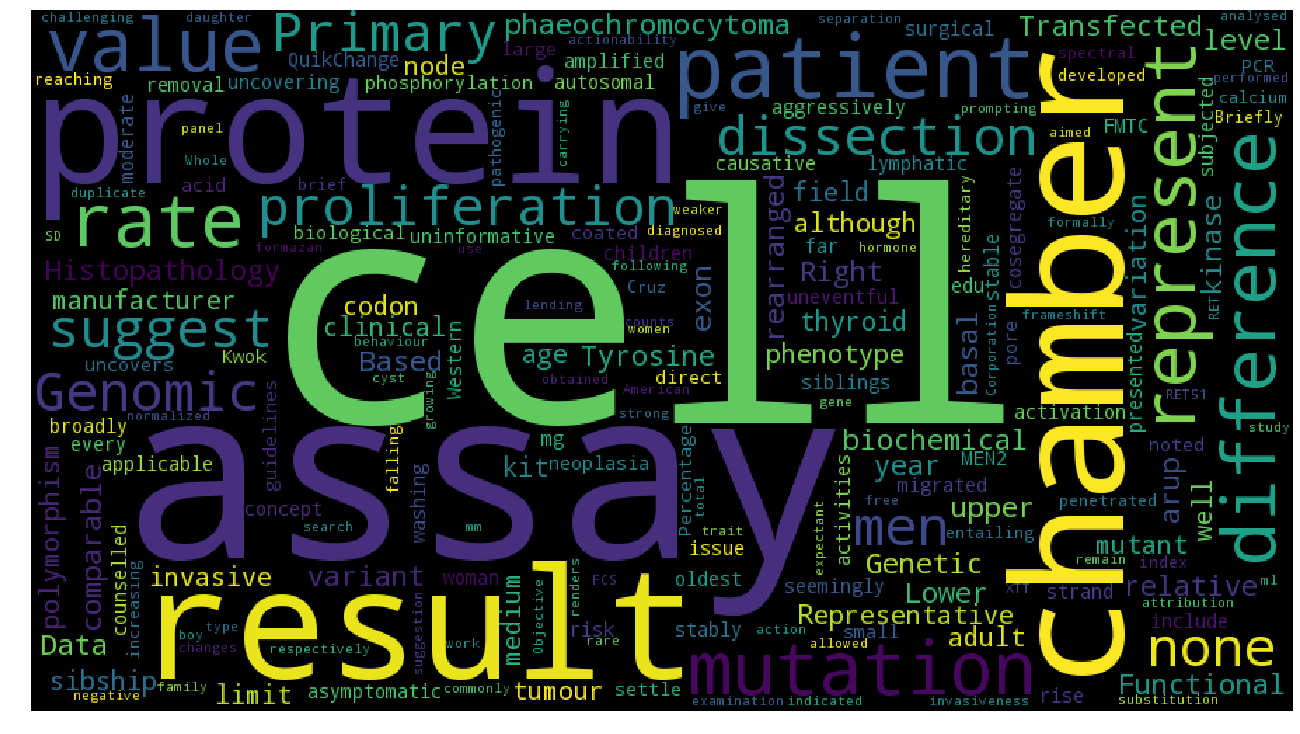

In [70]:
plot_Cloud(class2_wordclou)

In [71]:
class3_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(3)))

['caspase', 'cells', 'CD95', 'microg', 'cell', 'ml', 'activation', 'antibodies', 'expression', 'PBLs', 'apoptosis', 'h', 'stimulated', 'transfected', 'using', 'GFP', 'anti', 'CD28', 'individuals', 'stimulation', 'normal', 'patient', 'type', 'shown', 'showed', 'data', 'lymphocytes', 'antibody', 'defects', 'also', 'wild', 'mutant', 'IL', 'NK', 'family', 'TCR', 'construct', 'B', 'responses', 'lymphocyte', 'CD3', 'mutation', 'primer', 'surface', 'protein', 'ALPS', 'analysis', 'homozygous', 'CD25', 'vector', 'line', 'control', 'defective', 'used', 'text', 'mutations', 'CD8', 'fusion', 'image', 'pair', 'signalling', 'induced', 'may', 'proteins', 'found', 'deficiency', 'purified', 'immunodeficiency', 'CD69', 'Table', 'death', 'either', 'DISC', 'deficient', 'two', 'primers', 'affected', 'RNAi', 'members', 'b', 'assays', 'human', 'analysed', 'Caspase', 'induction', 'immune', 'experiments', 'Arg248Trp', 'FADD', 'Jurkat', 'shows', 'mitogen', 'patients', '2B4', 'nonspecific', 'show', 'controls', '

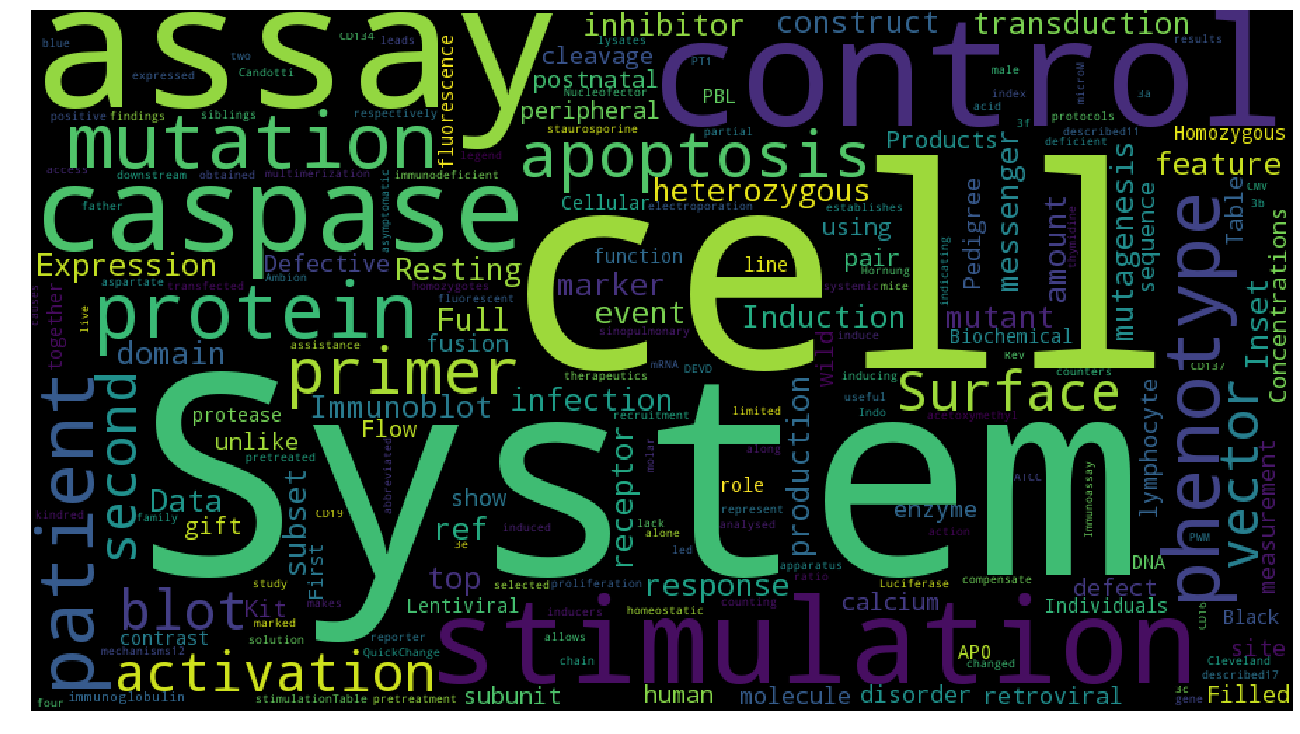

In [72]:
plot_Cloud(class3_wordclou)

In [73]:
class4_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(4)))

['RUNX1', 'mutations', 'AML', 'leukemia', 'mutation', 'FPD', 'CBF', 'et', 'al', 'PEBP2', 'mutants', 'point', 'cases', 'binding', 'C', 'mutant', 'type', 'may', 'proteins', 'DNA', 'domain', 'Runt', 'negative', 'gene', 'Table', 'dominant', 'terminal', 'MDS', 'wild', 'also', 'missense', 'showed', 'M0', 'cells', 'affected', 'described', 'individuals', 'genes', 'activity', 'However', 'sporadic', 'subtype', 'pedigree', 'transactivation', 'leukemias', 'exon', 'status', 'nonsense', 'disease', 'biallelic', 'localization', 'heterodimerization', 'mechanism', 'RUNX', 'indicated', 'provide', 'studies', 'frameshift', 'inhibitory', 'region', 'two', 'chimeric', 'exons', 'AML1', 'identified', 'normal', 'family', 'RUNX2', 'resulting', 'K83E', 'patients', 'genetic', 'show', 'amino', 'haploinsufficiency', 'found', 'Therefore', 'effects', 'alterations', 'trisomy', 'shown', 'protein', 'activities', 'help', 'deletion', '2003', 'assay', 'control', 'familial', 'site', 'effect', 'myeloid', 'function', 'new', 're

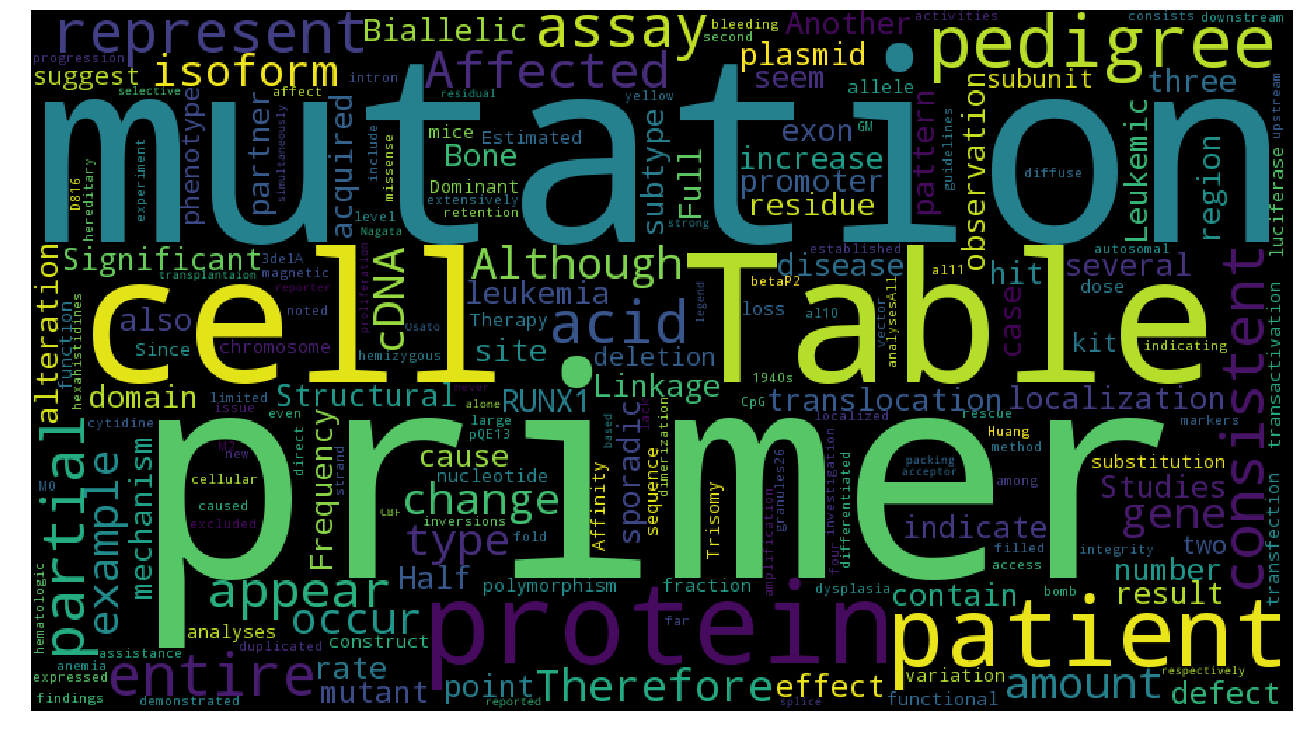

In [74]:
plot_Cloud(class4_wordclou)

In [75]:
class5_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(5)))

['mutations', 'et', 'al', 'new', 'RET', 'transforming', 'MTC', 'transfected', 'mutation', '0', 'silico', 'cell', 'number', 'FFU', 'activity', 'known', 'cells', 'M918T', 'score', '3T3', 'C634R', 'NIH', 'colonies', 'DNA', 'six', 'agar', 'vitro', 'showed', 'analysis', 'assay', 'T338I', 'risk', 'S904F', 'V648I', 'growth', 'germline', 'control', 'lines', 'subjects', 'M918V', 'mg', 'low', 'M848T', 'results', 'A883T', 'two', '2011', 'soft', 'associated', 'controls', 'genetic', 'type', 'found', 'V804M', '8C', 'screening', 'one', 'patients', 'Y791F', 'L790F', 'Deleterious', 'Table', 'G691S', 'time', 'method', 'gene', 'family', 'non', 'observed', 'wild', 'using', 'clinical', 'per', 'GD', 'CMV', 'performed', 'ATA', 'used', 'www', 'rare', 'proliferation', 'K', 'journals', 'produced', 'org', 'endocrinology', 'pRC', 'line', 'plate', 'sporadic', 'C', 'ability', 'N', 'different', 'functional', 'e', 'GV', 'study', '1993', 'years', 'members', 'rates', 'B', 'calculated', 'according', 'also', 'missense', 

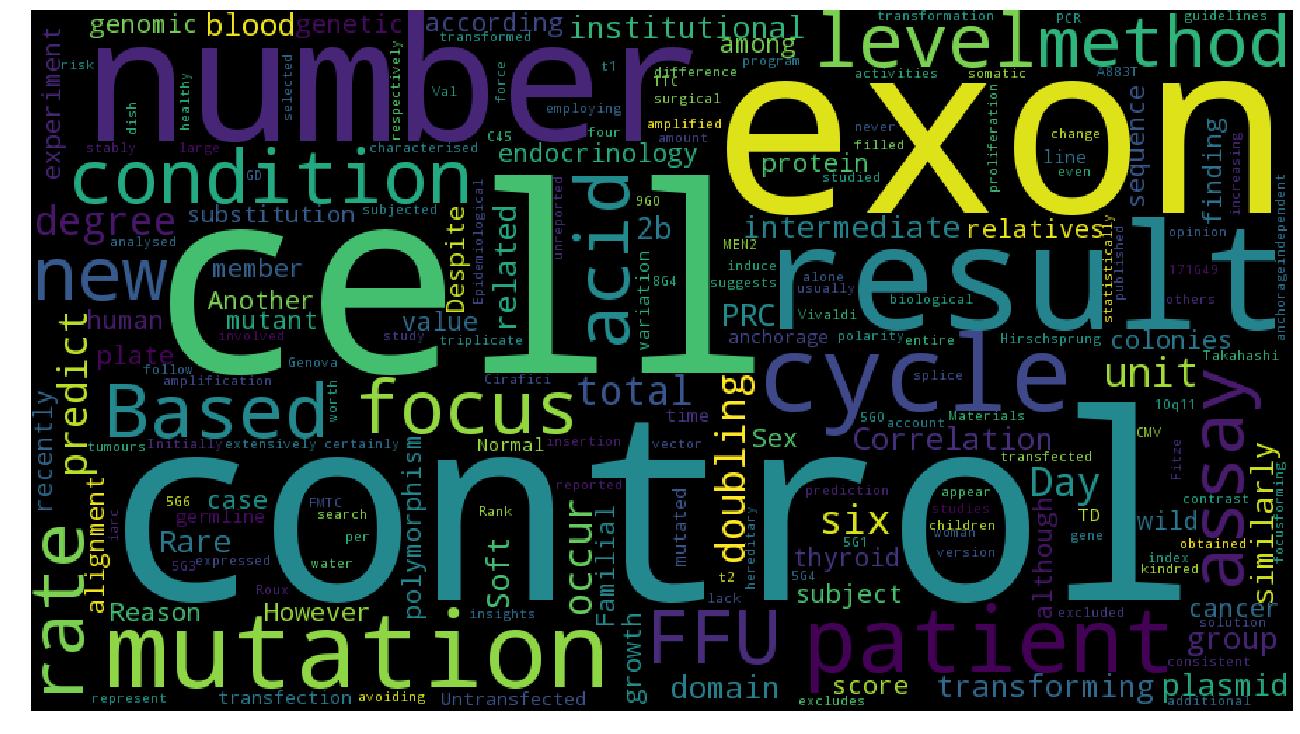

In [76]:
plot_Cloud(class5_wordclou)

In [77]:
class6_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(6)))

['AML1', 'mice', 'AML', 'mutations', 'MDS', 'cells', 'patients', 'D171N', 'Evi1', 'mutants', 'et', 'al', 'DNA', 'expression', 'C', 'S291fs', '0', 'using', 'analysis', 'leukemia', 'mouse', 'found', 'binding', 'mutation', 'PCR', 'CBF', 'normal', 'one', 'BM', 'gene', 'transplantation', 'type', 'high', 'site', 'induced', 'WT', 'cell', 'showed', 'Table', 'point', 'also', 'domain', 'radiation', 'integration', 'study', 'cases', 'detected', 'dose', 'hematopoietic', 'patient', 'leukemic', 'wild', 'IDs', 'bomb', 'potential', 'transduced', 'M0', 'shown', 'blasts', 'bone', 'among', 'model', 'n', 'marrow', 'spleen', 'morbid', 'survivors', 'pediatric', 'performed', 'BMT', 'identified', 'containing', 'B', 'data', 'two', 'developed', 'samples', 'used', 'g', 'mM', '1999', 'SSCP', 'malignancies', 'trisomy', 'acute', 'antibody', 'hematologic', 'blood', 'retrovirus', '2000', 'runt', 'related', 'acquired', 'missense', 'reported', 'received', 'RHD', 'anti', 'without', 'treated', 'RAEB', 'lane', 'including',

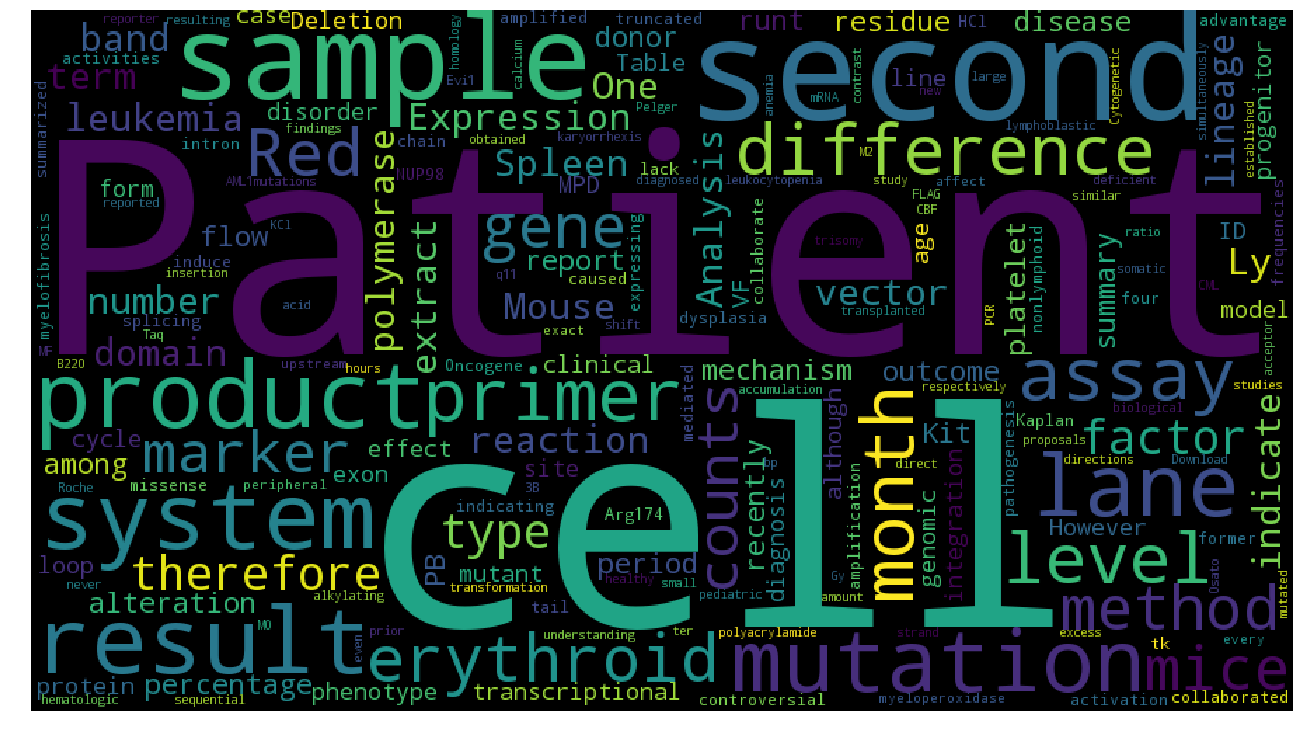

In [78]:
plot_Cloud(class6_wordclou)

In [79]:
class7_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(7)))

['RUNX1', 'RUNX', 'RUNX3', 'cell', 'RUNX2', 'cancer', 'cells', 'expression', 'p53', 'protein', 'DNA', 'tumour', 'mutations', 'genes', 'transcription', 'also', 'proteins', 'binding', 'differentiation', 'development', 'associated', 'signalling', 'might', 'factor', 'activity', 'mice', 'family', 'oncogenic', 'increased', 'AML', 'leukaemia', 'gene', 'Runx3', '2015', 'interaction', 'domain', 'bone', 'role', 'mediated', 'function', 'growth', 'Runt', 'TGF', 'WNT', 'known', 'transcriptional', 'gastric', 'phosphorylation', 'response', 'members', 'dependent', 'stem', 'CBF', 'ability', 'cycle', 'REVIEWS', 'functions', 'kinase', 'tumours', 'ARF', 'complex', 'pathway', 'lineage', 'acute', 'induced', 'levels', 'epithelial', 'B', 'ETO', 'suggesting', 'activities', 'regulation', 'breast', 'involved', 'suppressor', 'CD8', 'inactivation', 'activation', 'progression', 'senescence', 'degradation', 'mouse', 'human', 'fusion', 'Moreover', 'induce', 'REF', 'point', 'promoter', 'Runx2', 'pathways', 'VOLUME', '

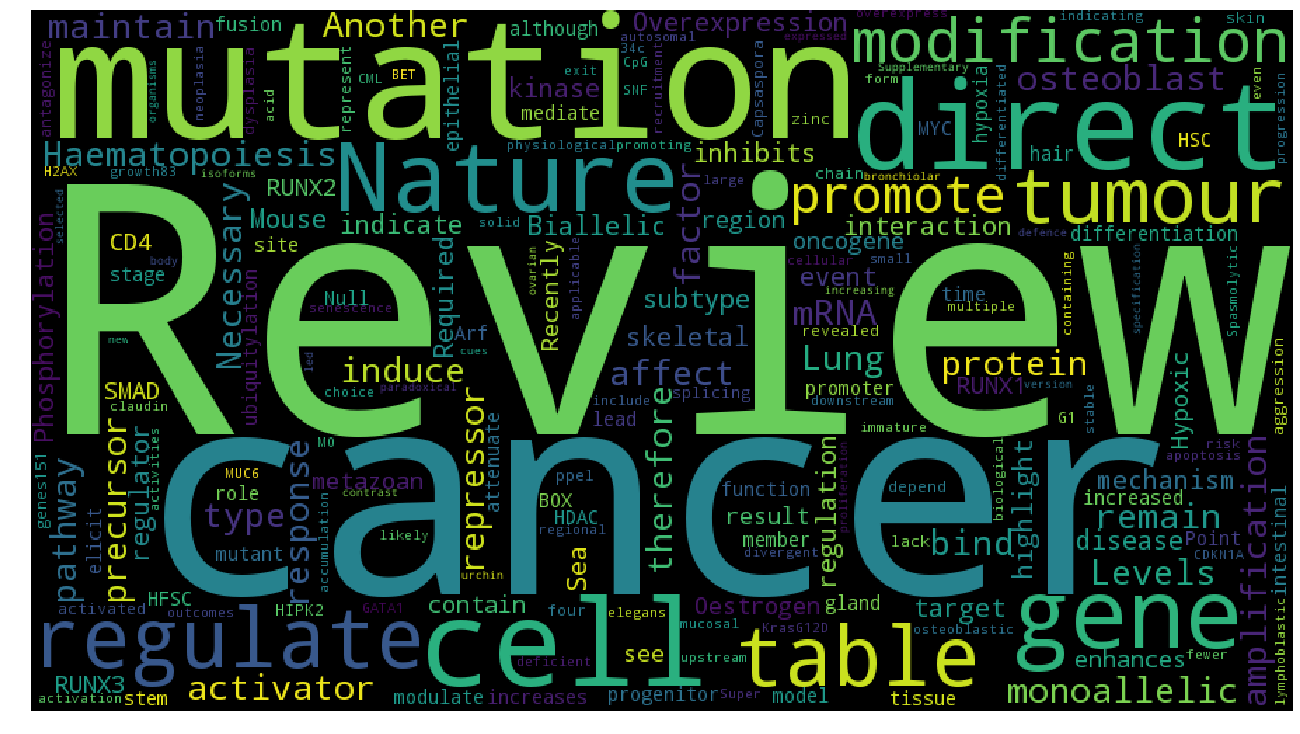

In [80]:
plot_Cloud(class7_wordclou)

In [81]:
class8_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(8)))

['leiomyomas', 'HMGIC', 'gene', 'genes', 'RAD51B', 'HMGA2', 'using', 'identified', 'leiomyoma', 'expression', 'rearrangements', 'subtype', 'expressed', 'exon', 'within', 'MED12', 'FC', 'uterine', 'sequences', 'chromosome', 'PCR', 'region', 'al', 'also', 'Dataset', '0', 'samples', 'one', 'et', 'deletions', 'analysis', 'previously', 'data', 'fusion', 'COL4A5', 'myometrium', 'PLAG1', 'DNA', 'C', 'tumors', 'tissue', 'specific', 'significantly', 'detected', 'regulated', 'factor', 'used', 'COL4A6', 'subtypes', 'two', 'WGS', 'corresponding', '22q', 'studies', 'tumor', 'uniquely', 'sequencing', 'reported', 'RACE', 'Table', 'FH', 'study', 'revealed', '1p', 'regulation', 'transcripts', 'Leiomyomas', 'RNA', 'intron', 'size', 'primer', 'cases', 'shown', 'significant', '7q22', 'specimens', 'changes', 'coding', 'mutations', 'three', 'HMGI', 'pathway', 'protein', 'different', 'driver', 'S1', 'binding', 'performed', 'Illumina', 'high', 'located', 'including', 'genetic', 'sequence', 'CUA', 'translocati

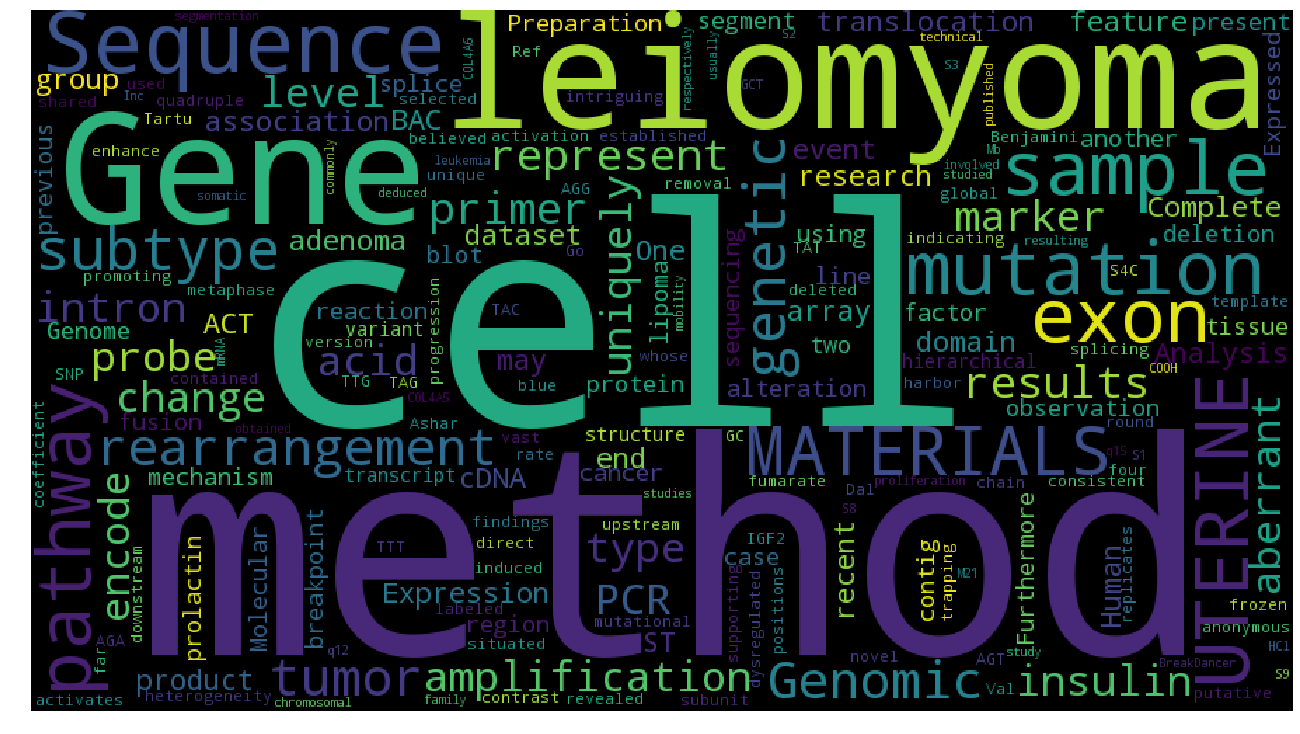

In [82]:
plot_Cloud(class8_wordclou)

In [83]:
class9_wordclou = WordCloud(width=900, height=500).generate(create_word_corpus(str(9)))

['MED12', 'C', 'CDK8', 'Cyclin', 'et', 'al', 'mutations', 'Mediator', 'kinase', 'activity', 'mutant', 'binding', 'WT', 'cells', '0', 'leiomyoma', 'expressing', 'linked', 'groove', 'FLAG', 'type', 'mM', 'surface', 'uterine', 'subunits', 'exon', 'interaction', 'B', 'buffer', 'leiomyomas', 'interface', 'protein', 'disrupt', 'core', 'findings', 'cell', 'CDK19', '2011', 'eluted', 'dependent', 'module', 'wild', 'using', 'specific', 'associated', 'activates', 'II', 'binds', 'N181A', 'analysis', 'identify', 'Uterine', 'Scientific', '2013', '2012', 'L', 'association', 'subunit', 'proteins', 'oncogenic', 'molecular', 'Thermo', 'immunoprecipitates', 'incubated', 'also', 'conserved', 'D182A', 'subjected', 'activation', 'direct', 'expressed', 'CTD', 'derivatives', '32P', 'mL', 'performed', 'final', 'samples', 'bind', 'tagged', 'solvent', 'assays', 'min', 'mutants', 'G44D', 'principal', 'impact', 'co', 'HNN', 'pol', 'basis', 'Table', 'GST', 'potential', 'reduced', 'spectrometry', 'required', 'insect

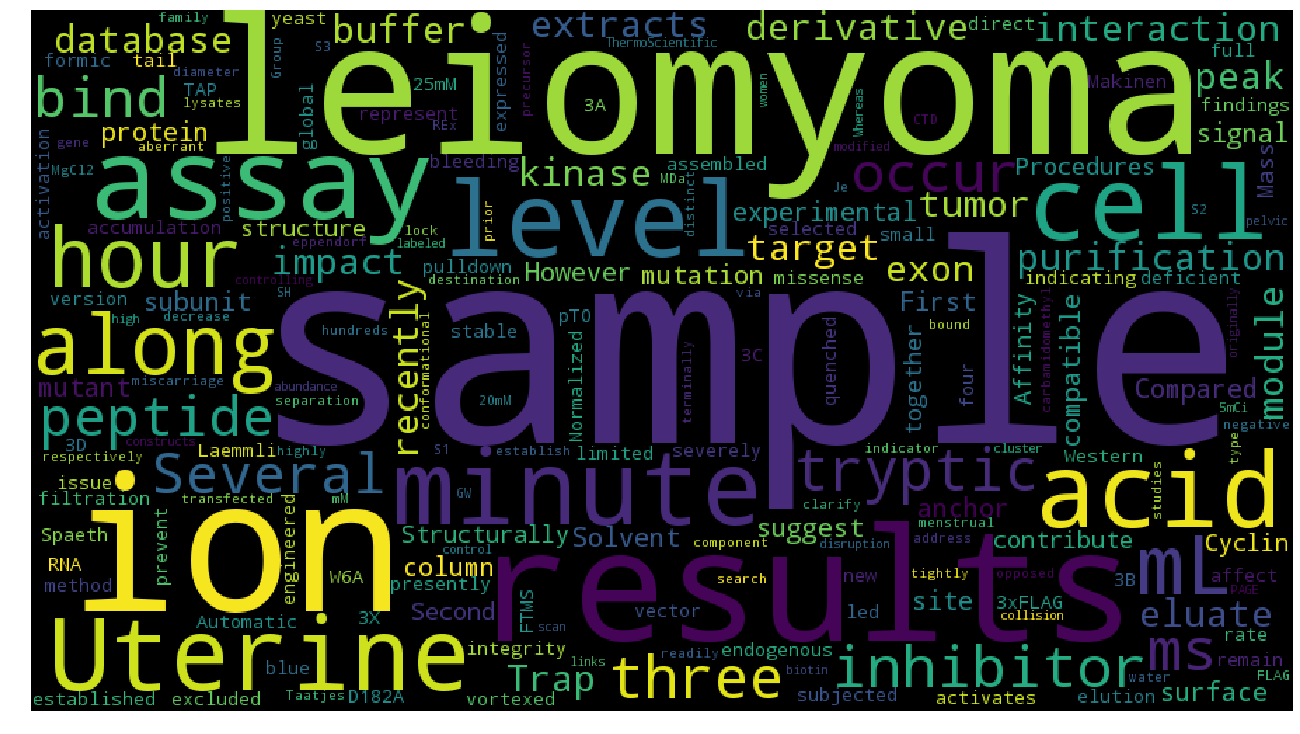

In [84]:
plot_Cloud(class9_wordclou)